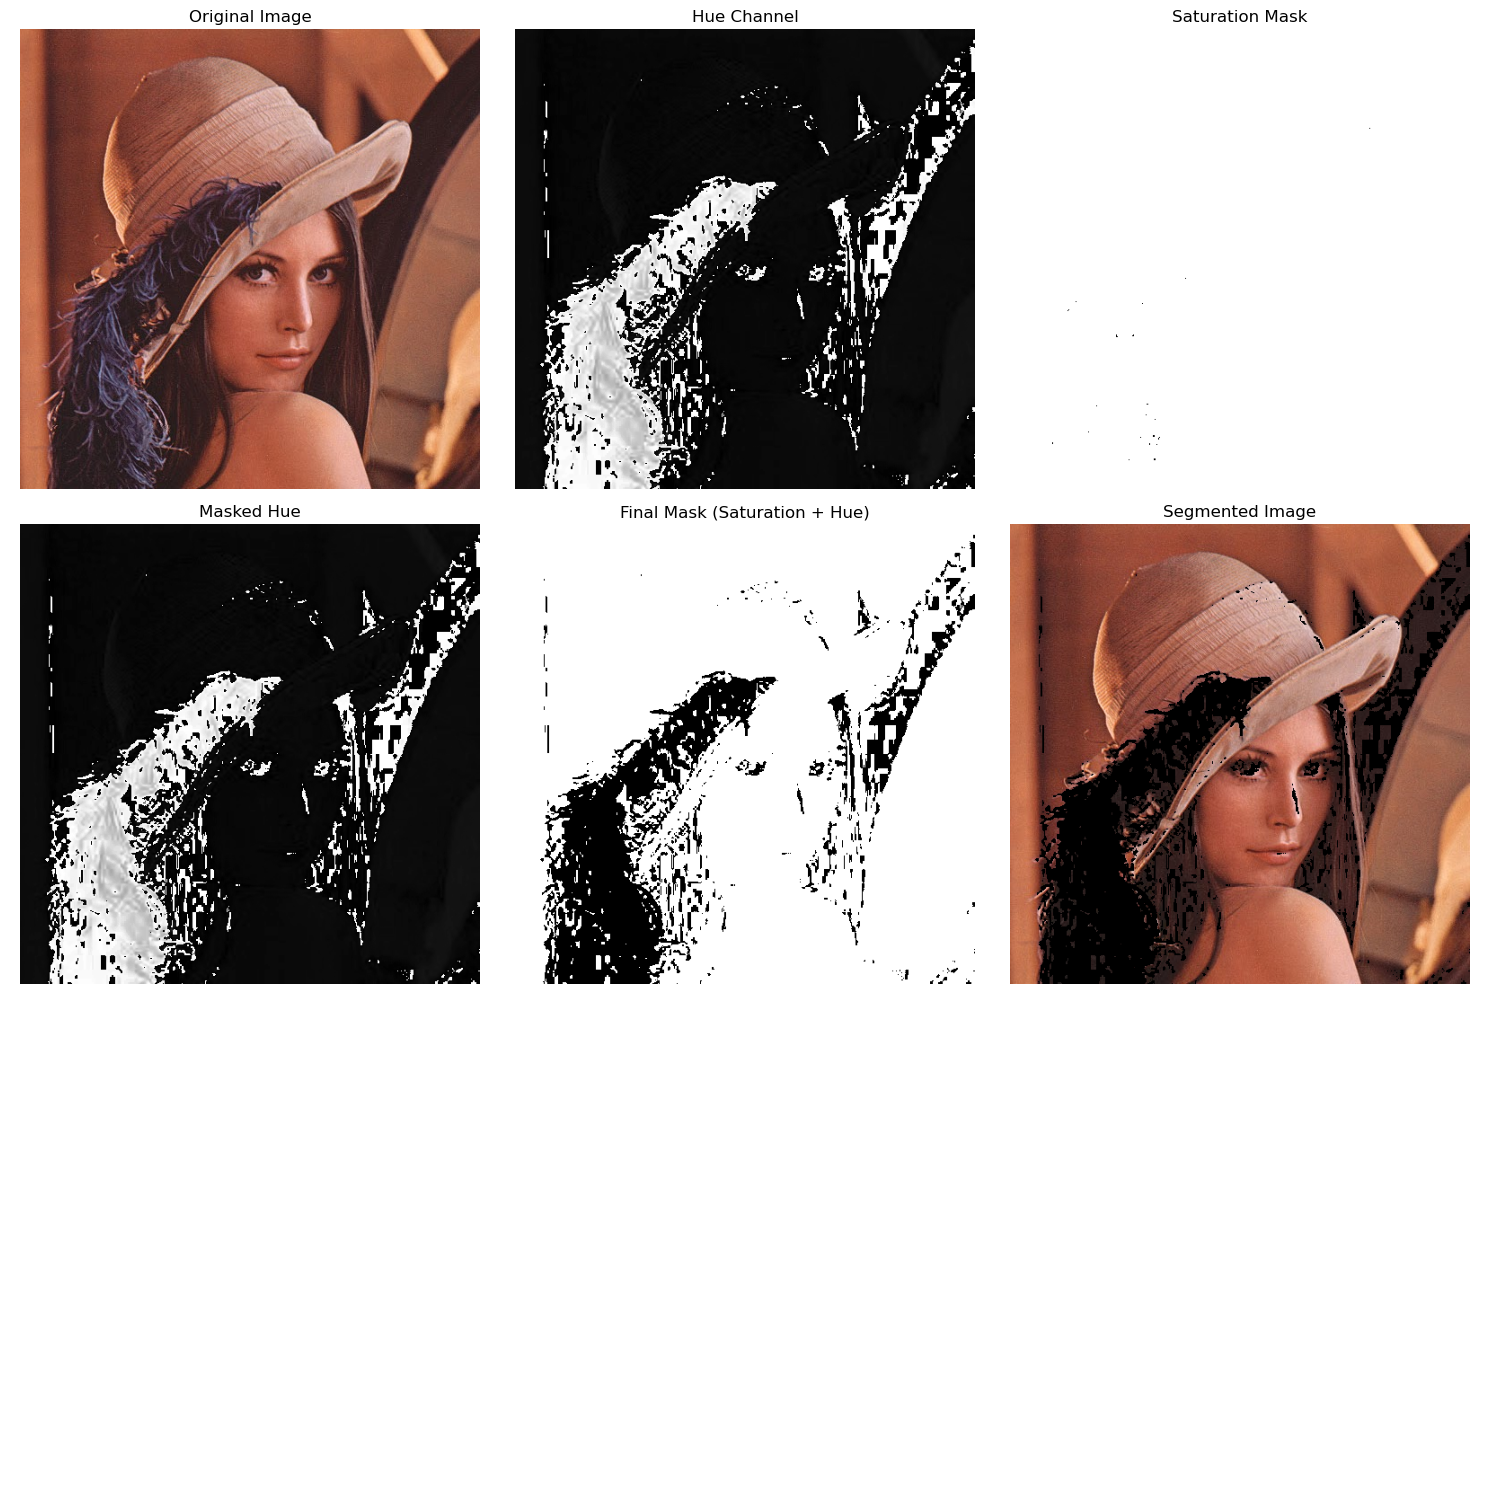

In [7]:
# This script demonstrates a detailed method for segmenting a reddish region in an image using the HSI (Hue, Saturation, Intensity) color space. 
# The process involves the following steps:
#
# 1. Load the input image and convert it from BGR to HSI color space (OpenCV represents HSI as HSV).
#    - The Hue channel represents the type of color (e.g., red, green, blue).
#    - The Saturation channel indicates the purity or intensity of the color.
#    - The Intensity channel reflects the brightness of the image.
#
# 2. Extract the Hue, Saturation, and Intensity channels separately for analysis.
#
# 3. Apply a threshold on the Saturation channel:
#    - Identify and mask regions with sufficient color saturation.
#    - A threshold value of 10% of the maximum saturation is used to isolate prominent colors.
#
# 4. Use the Saturation mask to filter the Hue channel:
#    - This step ensures only highly saturated pixels are considered for further processing.
#
# 5. Define a range for reddish hues in the Hue channel:
#    - A typical range for reddish hues is between 0 and 20 (in OpenCV's HSV representation).
#    - A binary mask is created by selecting Hue values within this range.
#
# 6. Combine the Saturation and Hue masks:
#    - The final mask is the intersection of pixels satisfying both the saturation and hue conditions.
#
# 7. Apply the final mask to the original image:
#    - The mask is used to segment the regions of interest (reddish areas) from the original image.
#
# 8. Display the results:
#    - Original image to understand the input.
#    - Hue channel to visualize color information.
#    - Saturation mask highlighting regions of high color purity.
#    - Masked Hue image to show the effect of the saturation mask on the Hue channel.
#    - Final binary mask (Saturation + Hue combined) identifying the reddish regions.
#    - Segmented image displaying the extracted reddish areas from the original image.
#
# This method provides a step-by-step visualization of the segmentation process...

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# THEORETICAL ASPECT:
# In this example, we aim to segment a color image in the HSI (Hue, Saturation, Intensity) color space.
# The HSI space is particularly useful for color-based segmentation:
# - The Hue channel represents color information.
# - The Saturation channel represents the intensity or purity of the color.
# - The Intensity channel represents the brightness of the image and is typically ignored for color segmentation.
#
# Approach:
# 1. Convert the image from BGR (or RGB) to HSI space.
# 2. Extract the Hue, Saturation, and Intensity channels.
# 3. Threshold the Saturation channel to create a mask that isolates high-saturation areas (regions of interest).
# 4. Use the Hue channel to focus on a specific color range (in this case, a reddish hue).
# 5. Combine the Saturation and Hue masks to identify the desired regions of interest.
# 6. Apply the mask to the original image and display the segmented result.
#
# This method will highlight regions with a reddish hue and sufficient saturation while ignoring regions of low saturation.

# Load an example image
image_path = os.path.join(os.getcwd(), 'data', 'images', 'lena_color.jpg')  # Replace with your image path
image = cv2.imread(image_path)

# Convert the image from BGR to HSI (Hue, Saturation, Intensity)
image_hsi = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Extract Hue, Saturation, and Intensity channels
hue = image_hsi[:, :, 0]
saturation = image_hsi[:, :, 1]
intensity = image_hsi[:, :, 2]

# Step 1: Apply a threshold to the Saturation channel (e.g., 10% of max saturation)
threshold_saturation = 0.1 * np.max(saturation)
saturation_mask = saturation > threshold_saturation

# Step 2: Mask the Hue image with the Saturation mask
masked_hue = hue * saturation_mask.astype(np.uint8)

# Step 3: Set a range of Hue values for the reddish region (assuming red hues around 0-20)
min_hue = 0
max_hue = 20
hue_mask = (masked_hue >= min_hue) & (masked_hue <= max_hue)

# Step 4: Apply the final mask to the original image (combining both Saturation and Hue thresholds)
final_mask = saturation_mask & hue_mask

# Step 5: Apply the mask to the original image
segmented_image = cv2.bitwise_and(image, image, mask=final_mask.astype(np.uint8))

# Step 6: Display the results in a two-column format with more rows
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Original image
axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Hue Channel
axes[0, 1].imshow(hue, cmap='gray')
axes[0, 1].set_title('Hue Channel')
axes[0, 1].axis('off')

# Saturation Mask
axes[0, 2].imshow(saturation_mask, cmap='gray')
axes[0, 2].set_title('Saturation Mask')
axes[0, 2].axis('off')

# Masked Hue
axes[1, 0].imshow(masked_hue, cmap='gray')
axes[1, 0].set_title('Masked Hue')
axes[1, 0].axis('off')

# Final Mask
axes[1, 1].imshow(final_mask, cmap='gray')
axes[1, 1].set_title('Final Mask (Saturation + Hue)')
axes[1, 1].axis('off')

# Segmented Image
axes[1, 2].imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
axes[1, 2].set_title('Segmented Image')
axes[1, 2].axis('off')

# Additional empty space for better layout
axes[2, 0].axis('off')
axes[2, 1].axis('off')
axes[2, 2].axis('off')

plt.tight_layout()
plt.show()
